# Computergestützte Mathematik zur Analysis

Vorlesung vom 17.11.2022

&copy; 2022 Prof. Dr. Rüdiger W. Braun 

In [2]:
from sympy import *
init_printing()

# Funktionen


In [3]:
def f(x):
    return x**2 + 3*sin(x) + 15   # Funktionskörper abgesetzt (wie Schleifenkörper)

In [4]:
f(1)

In [5]:
f(1.)

In [6]:
f(pi/2)

In [7]:
y = S('y')
f(y)

Duck typing:

“When I see a bird that walks like a duck and swims like a duck and quacks like a duck, I call
that bird a duck.”

– James Whitcomb Riley

In [8]:
def fakultaet(n):
    res = 1
    for j in range(1, n+1):
        res *= j
    return res

In [12]:
fakultaet(3)

In [13]:
fakultaet(120) / factorial(120)

# Mathematische Funktion vs. Programmfunktion

|                             |sympy               |Python                 |
|-----------------------------|--------------------|-----------------------|
|Definition                   |als Ausdruck `f`    |`def f(x)`             |
|Auswertung                   |`f.subs(x, ...)`    |`f(x)`                 |
|mathematische Manipulationen |ja                  |nein                   |
|beliebige Argumente          |nein                |ja                     |
|Nebeneffekte                 |nein                |ja                     |

Verwandlung Python-Funktion in Ausdruck durch Auswertung

In [14]:
def f(x):                 # x ist lokal
    return cos(x**2)

In [15]:
y = Symbol('y')
f(y)

Verwandlung von Ausdruck in Funktion

zum Zwecke der numerischen Auswertung

In [16]:
p = y**2/2

In [19]:
f = lambdify(y, p)
f

<function _lambdifygenerated(y)>

In [20]:
f(1)

In [21]:
f(pi)

# Einfache Plots von Ausdrücken

In [22]:
p

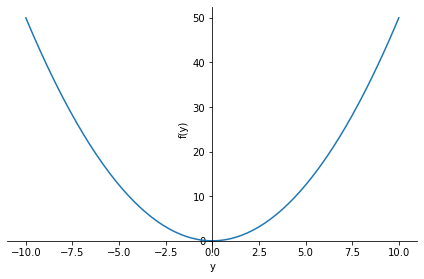

In [23]:
plot(p)

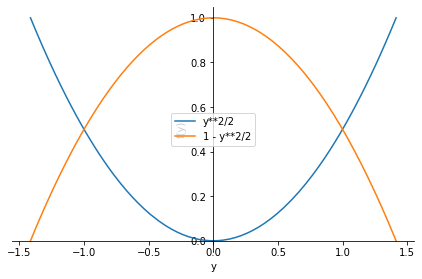

In [24]:
p1 = plot(p, 1 - p, (y,-sqrt(2),sqrt(2)), show=False)
p1.legend = True
p1.show()

Wenn das nicht reicht, verwenden wir `matplotlib`

# Lösungen von Gleichungen

In [27]:
x = S('x')
glg = Eq(x**2, 2)
glg

In [28]:
lsg = solve(glg)
lsg

Probe:

In [29]:
lsg_dict = solve({glg})  # diese Form ist besser für die Probe
lsg_dict

In [31]:
lsd = solve(glg, dict=True)
lsd

In [32]:
for l in lsg_dict:
    display(glg.subs(l))

True

True

Die Fibonacci-Zahlen sind von der Form $f_n = aA^n + bB^n$.  Wir bestimmen die Unbekannten.

In [33]:
a, A, b, B = symbols("a A b B")  

In [34]:
def g(n):
    return a*A**n + b*B**n

In [35]:
gls = set()
for n in range(1,5):
    glg = Eq(fibonacci(n), g(n))
    gls.add(glg)

gls

In [36]:
lsg = solve(gls)
lsg

In [37]:
g(n).subs(lsg[0])  

$n$ ist aus der Schleife herausgesickert.  ($n$ has leaked from the loop)

In [38]:
n = S('n')
g(n).subs(lsg[0])

In [42]:
for nn in range(10, 14):
    print(fibonacci(nn), g(nn).subs(lsg[0]).expand())

55 55
89 89
144 144
233 233


Probe

In [40]:
for nn in range(1,35):
    if fibonacci(nn) != g(nn).subs(lsg[0]):
        raise ValueError(f"ungleich für n={nn}")

ValueError: ungleich für n=1

In [43]:
for nn in range(1,35):
    if fibonacci(nn) != g(nn).subs(lsg[0]).expand():
        raise ValueError(f"ungleich für n={nn}")

No news is good news.

Wir prüfen jetzt noch die Rekursionsgleichung $f_{n+2} = f_{n+1} + f_n$

In [44]:
def G(n):
    return g(n).subs(lsg[0])

In [45]:
tmp = G(n+2)-G(n+1)-G(n)
tmp

In [46]:
tmp.expand()

# Lösung in Abhängigkeit von Parametern

In [47]:
p = S('p')
q = S('q')
f = x**2 + p*x + q
glg = Eq(f, 0)
glg

In [48]:
solve(glg)

In [51]:
solve(glg, {x})


Für welche Werte von $p$ und $q$ hat $f$ eine doppelte Nullstelle?

In [52]:
glg2 = Eq(f.diff(x), 0)
glg2

In [55]:
solve({glg, glg2}, {x,q})

Für beliebiges $p$ und $q = \frac{p^2}4$ ist $x=-\frac p2$ doppelte Nullstelle von $f$.

# Annahmen bei `solve`

In [56]:
glg = Eq(x**4, 16)
solve(glg)

In [57]:
y = Symbol('y', positive=True)
solve(glg.subs(x, y))

# Sympy rechnet komplex

auch wenn man es nicht erwartet

In [58]:
I

In [59]:
I**2

In [60]:
exp(I*pi/2)

In [61]:
((I+1)**3).expand()

In [62]:
re(3+4*I)

In [63]:
im(3+4*I)

In [64]:
conjugate(3+4*I)

In [65]:
re(exp(I*x))

In [66]:
x = Symbol('x', real=True)

In [67]:
re(exp(I*x))

In [68]:
b = I*(I**Rational(3,7) - I**Rational(-3,7))
b

$b$ ist reell

In [69]:
b.simplify()

In [70]:
b.expand(complex=True)

In [71]:
glg = Eq(exp(x), E)
solve({glg})

Es gibt aber noch mehr Lösungen

In [72]:
n = Symbol('n', integer=True)

In [74]:
glg.subs(x, 1 + 2*n*pi*I).simplify()

True

# Mengen von Nullstellen

In [75]:
lsg_cplx = solveset(glg)
lsg_cplx

{2⋅n⋅ⅈ⋅π + 1 │ n ∊ ℤ}

In [76]:
for (j, z) in zip(range(5), lsg_cplx):
    display(z)

In [77]:
list(zip([1,2,3], ['a', 'b', 'c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [78]:
solveset(glg, domain=Reals)

Andere Wahlen für domain: Naturals, Naturals0, Integers, Complexes (Voreinstellung)